In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree#to draw a classification
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/home/anu/Downloads/processed.cleveland(1).data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.shape

(303, 14)

In [4]:
df.columns=[ 'age',
'sex',
'cp',
'restbps',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'hd']
df.tail(10)

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

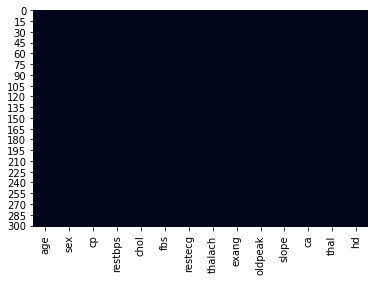

In [5]:
sns.heatmap(df.isnull(),cbar=False)
df.dtypes

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
#deal with missing values
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [9]:
len(df)

303

In [10]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]# missing values in ca & thal

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
6/303*100

1.9801980198019802

In [12]:
303-6

297

In [13]:
df_no_missing=df.loc[(df['ca']!='?')&(df['thal']!='?')]
df_no_missing
#removing ?

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [14]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
#splitting the data
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y=df_no_missing['hd'].copy()
y.unique()

array([0, 2, 1, 3, 4])

In [18]:
#cp is type of chest pain =>we cannot rank it,becoz any chest pain in danger



In [19]:
#Formatting or one hot encoding
X['cp'].unique()

array([1., 4., 3., 2.])

In [20]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [21]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
#applying encoding, to give equal weightage for ->cp,restecg,slop,thal
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [22]:
y_not_zero_index = y>0
y[y_not_zero_index]=1
y.unique()
#HD = 0 is no pain , and >0 are all pains..so categorize into just 0 & 1

array([0, 1])

In [23]:
from sklearn import tree


In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(xtrain,ytrain)

# clf_dt=>Classification decision tree

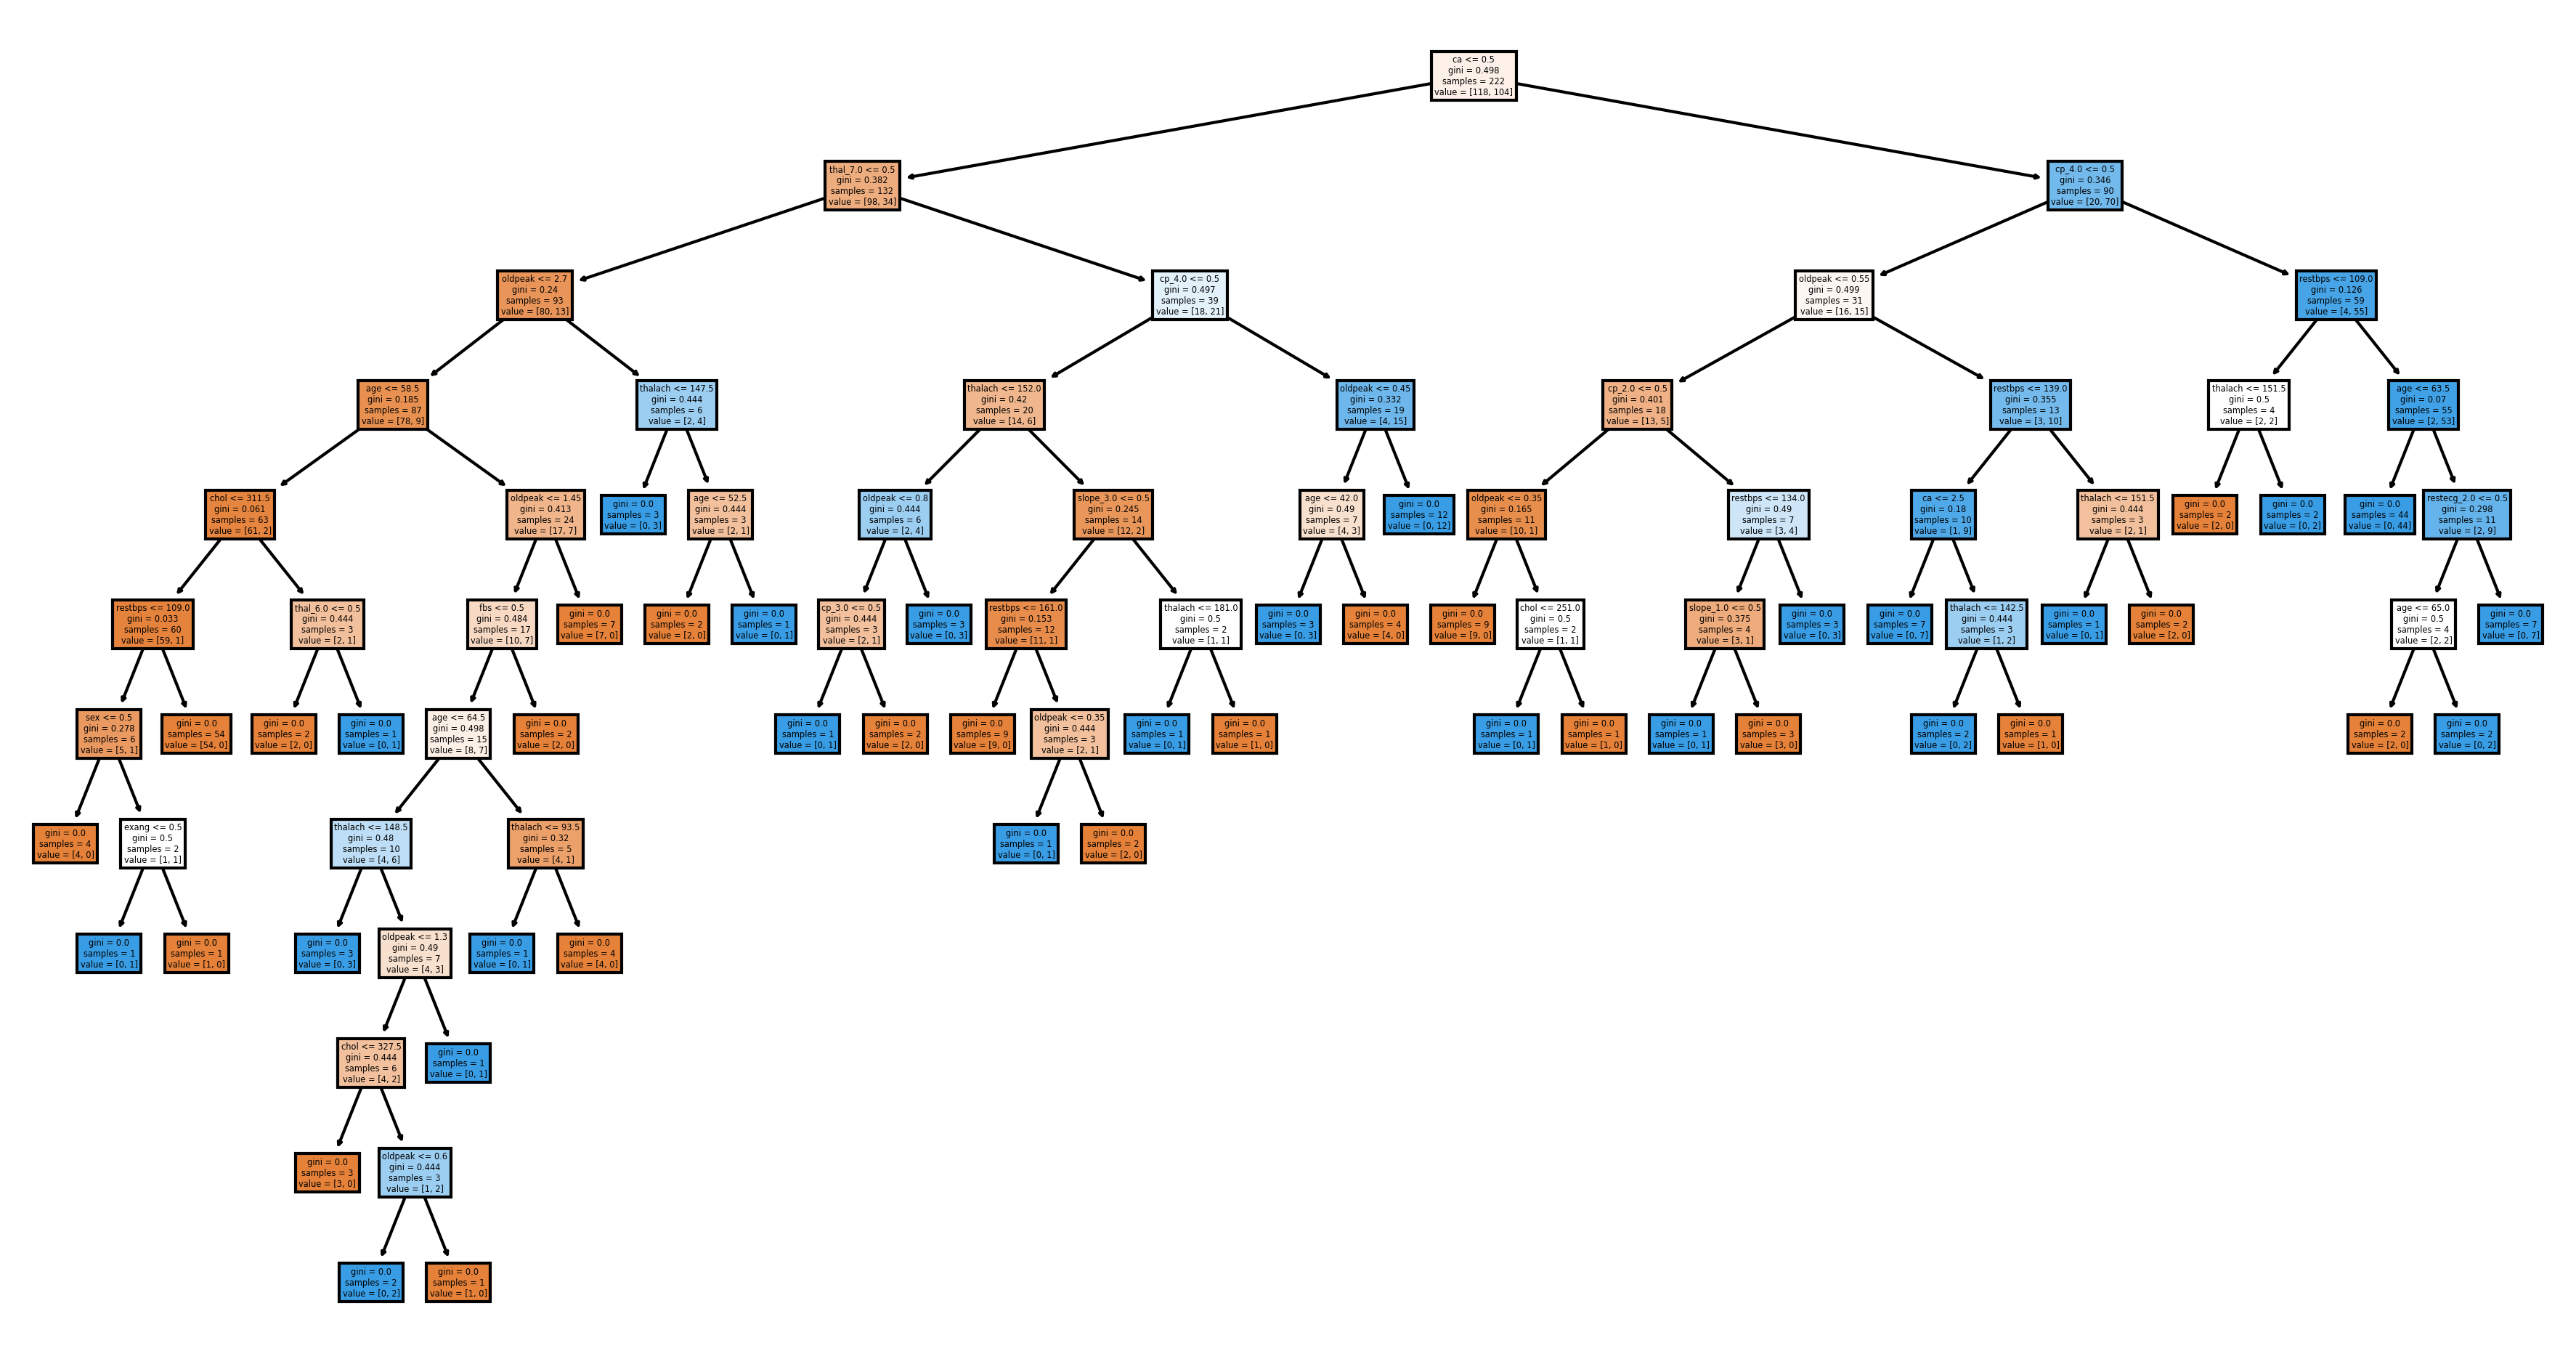

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8),dpi=300)
a=tree.plot_tree(clf_dt,feature_names=X_encoded.columns,\
                 max_depth=None,filled=True)#also try max_depth=3 or None
fig.savefig('tree28.png') 



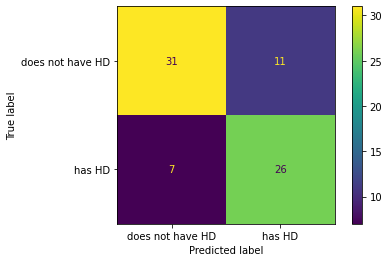

In [26]:
plot_confusion_matrix(clf_dt,xtest,ytest,display_labels=["does not have HD","has HD"])

In [27]:
31/42

0.7380952380952381

In [28]:
26/33

0.7878787878787878

In [29]:
#ccp=>Cost Complexity Pruning
path=clf_dt.cost_complexity_pruning_path(xtrain,ytrain)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [30]:
clf_dts=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(xtrain,ytrain)
    clf_dts.append(clf_dt)

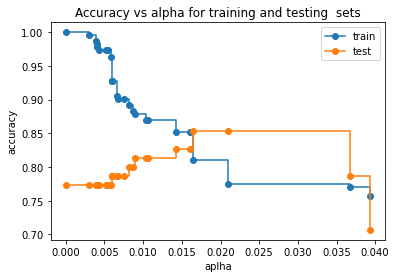

In [31]:
train_scores=[clf_dt.score(xtrain,ytrain) for clf_dt in clf_dts]
test_scores=[clf_dt.score(xtest,ytest) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel('aplha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing  sets")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle="steps-post")
ax.legend()
plt.show()
#plotting tree for each alpha values here

In [ ]:
#when alpha value become 0.015(for a particular data set(train&test) using cross validation, we get good output...
#alpha value with train score and ccp with test score 
#when alpha increases, at a particular area alpha keeps increasing ,then 

<AxesSubplot:xlabel='tree'>

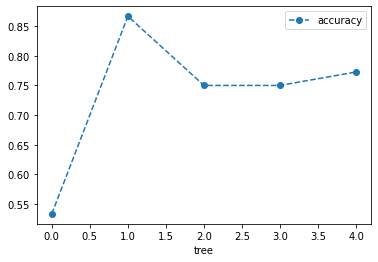

In [32]:
clf_dt =DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)

scores=cross_val_score(clf_dt,xtrain,ytrain,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [ ]:
#Even when we use the same alpha with different data set, we get different accuracy


<AxesSubplot:xlabel='alpha'>

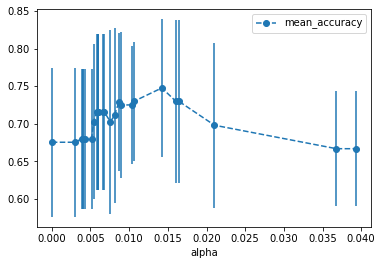

In [34]:
import numpy as np
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,xtrain,ytrain,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results=pd.DataFrame(alpha_loop_values,\
                          columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
#plot alpha with data set range(lines on each )

In [36]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)
                               &
                               (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [37]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [38]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,
                                    ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(xtrain,ytrain)

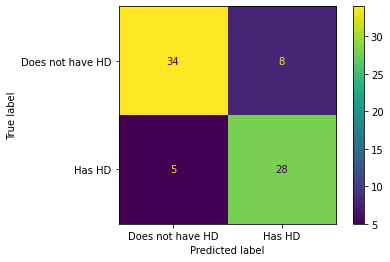

In [39]:
plot_confusion_matrix(clf_dt_pruned,
                     xtest,
                     ytest,
                     display_labels=["Does not have HD",'Has HD'])


In [40]:
34/42

0.8095238095238095

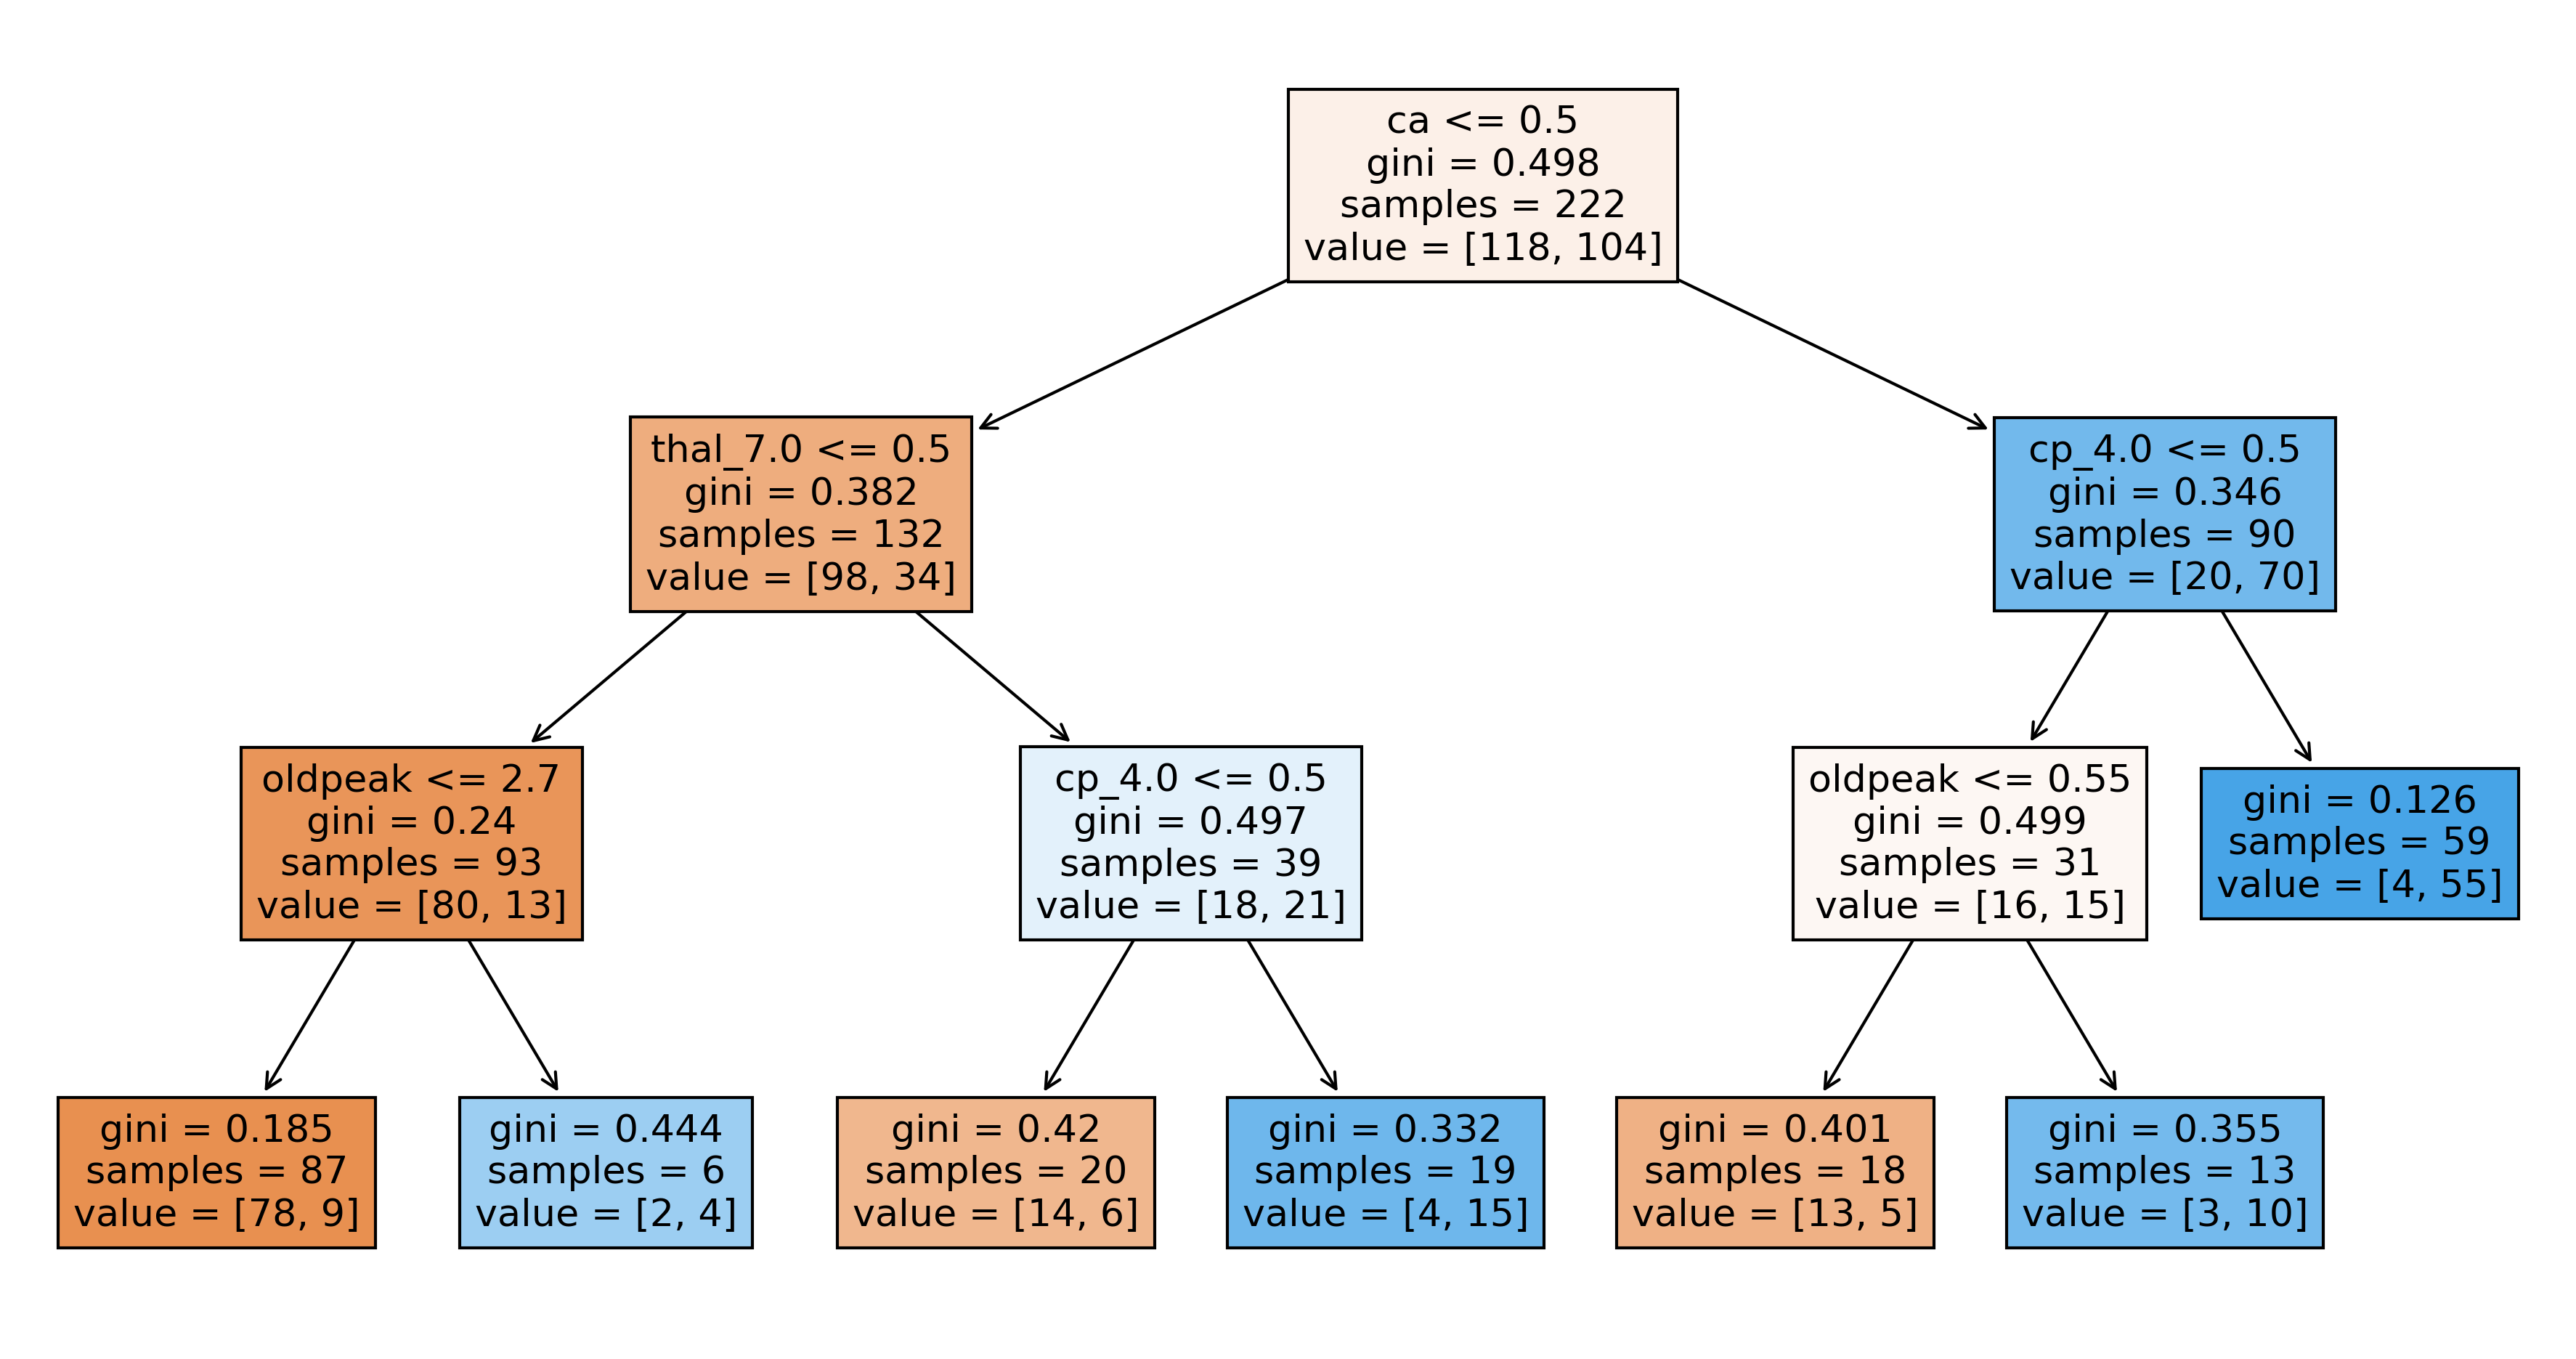

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8),dpi=300)
a=tree.plot_tree(clf_dt_pruned,feature_names=X_encoded.columns,\
                 max_depth=None,filled=True)#also try max_depth=3 or None
fig.savefig('treepruned.png') 
